# Horn Radio Telescope Spectrum Integration "Example

### Glen Langston, 2022 February 9

This notebook shows examples of using previously averaged hot and cold load observations to study a single days observations. 

The calibration requireds an observation of the sky, which is assumed to be very cold, 10 Kelvins (about -442 Fahrenheit), along with several observations of the ground, to calibrate the measured intensity of hydrogen in the arms of our Milky Way.

In [1]:
# find out your current directory
!pwd
# now add one directory up to find packages 
import sys
sys.path.append("../")

/Users/glangsto/Desktop/Research/jupyter/integrate


In [2]:
# Import the Radio Astronomy Service (RAS) code.
import ephem
import ras
import rasnames

In [3]:
datadir = "/Volumes/jansky/pi16-data-22Jan12"

In [4]:
# get a list of all files in the data directory.  The data are up a directory 

# "data" look in the 'data' directory for the observations
astfiles, countast = rasnames.splitNames(datadir, ".ast", "", doDebug=False)
print("Found  %d sky observations" % (countast))
print("Files: %s to %s " % ( astfiles[0], astfiles[countast-1]))

Found  549 sky observations
Files: /Volumes/jansky/pi16-data-22Jan12/22-01-12T045614.ast to /Volumes/jansky/pi16-data-22Jan12/22-01-13T045247.ast 


In [5]:
# get the hot and cold files just created and "kept" in directory
keepdir = "keep"
hotfiles, count = rasnames.splitNames(keepdir, ".hot", "", doDebug=False)
coldfiles, count = rasnames.splitNames(keepdir, ".ast", "", doDebug=False)

In [6]:
# now look in the list of directories and return the full file names
# This program only lookes for file types given.  The program could be used for any purpuse
# radio astronomy or any other type of input search.
datafiles, count = rasnames.splitNames(datadir, ".ast", "", doDebug=False)

In [7]:
# Now perform actual calibration and plotting of each observation
adate = ras.Plot()
adate.help("-BASE -X 16 -I 600 -V -S 22Jan.txt")
adate.hotfilename = hotfiles[0]
adate.coldfilename = coldfiles[0]


Fitting and subtracking a baseline
Telescope Index: 16
Spectral integration time for averaging:    600.0 s
Plotting intensity versus Velocity
Writing to Summary file: T16-22Jan.txt


Hot File keep/T16-22-01-10T082736.hot, Read 2048 channels
Cold File keep/T16-22-01-10T122055.ast, Read 2048 channels
Found 1 Cold Sky Obs.; Min El =    80.0, Low Gal Lat:    40.0
Median Receiver Temp:  178.52 +/-  0.24 ( 0.36  0.12) (K)
Ploting Intensity versus Velocity
Date: 2022-01-12
  Time   AZ,EL (deg)  Lon,Lat (deg)  Max-(K)-Median   X (km/s)  Count 
05:06:43   0.0, 80.0  168.5, 22.2    25.92     0.51     8.955   112500
05:19:50   0.0, 80.0  169.1, 24.3    21.40     0.31    10.090   112500
05:32:56   0.0, 80.0  169.7, 26.4    18.60     0.44    12.873   112500
05:46:02   0.0, 80.0  170.1, 28.6    15.30     0.36    13.179   112500
05:59:09   0.0, 80.0  170.5, 30.7    13.24     0.49     6.058   112500
06:12:15   0.0, 80.0  170.7, 32.9    11.25     0.31     3.873   112500
06:25:22   0.0, 80.0  170.9, 35.1    10.02     0.39     4.970   112500
06:38:28   0.0, 80.0  170.9, 37.3     8.62     0.14     2.752   112500
06:51:35   0.0, 80.0  170.9, 39.4     8.69     0.74     4.634   112500
07

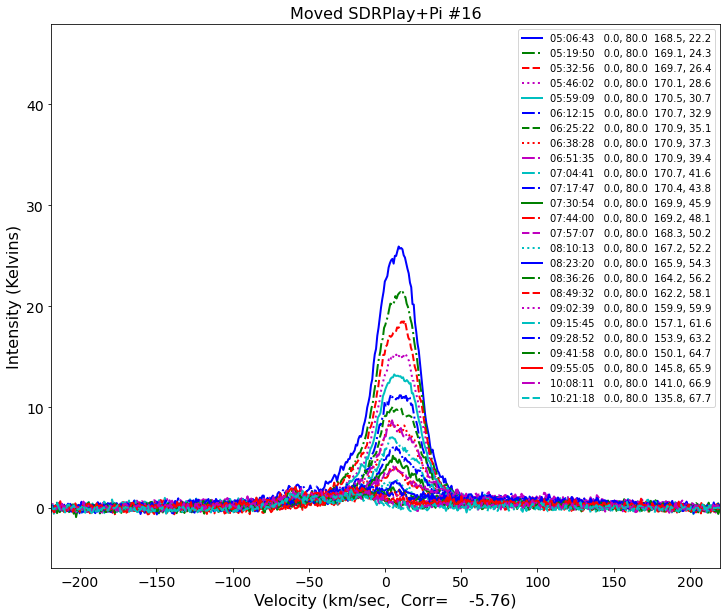

In [8]:
# tell the software to subtract a baseline
# The -X argument is used to distinguish telescopes if you have several

# now re-plot
adate.tsys(datafiles)

# Congratulations!
## You've used the Calibration spectra from your observations.
## Then you've calibrated each 10 minute block of observations
### Did you notice how much the spectra change in just 10 minutes?